## **Регулярные выражения** (regular expressions)
В простонародье *регулярки*, *regexp* или *regex*.

### Что это такое, и зачем оно нужно?
> Формальный язык для поиска и замены подстрок (patterns) в тексте.

У него свой синтаксис и своя логика... Если коротко, то все, что вы видите (а иногда и не видите) на экране - это символ!

Где лучше всего тестировать:
* [Notepad++](https://notepad-plus-plus.org/)
* [Regex101](https://regex101.com/)


### Что регулярки умеют?
Многое: например, находить точные соответствия:

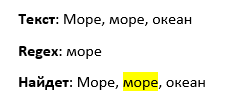

При этом:
* регистрозависимый поиск
* можно найти не только слово целиком, но и его часть

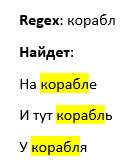
* по умолчанию выводит только первое входение

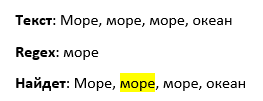
* кириллическое *а* и латинское *a* - это **разные** символы

Но, если бы регулярки умели только это, то было бы скучно, не правда ли?

Поэтому есть всякие специальные символы!

* есть символ `.`, который ищет один **любой** символ. Даже знаки пунктуации! Даже пробелы! Даже точку...

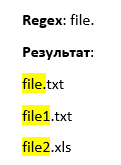

А как тогда, собственно, саму точку найти..?

**Экранировать**: делается при помощи обратного слэша `\` (не только для точки, но и для других специальных символов).

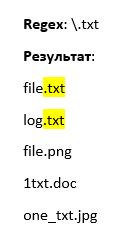

* есть диапазоны символов (полезно, когда мы не просто хотим любой символ найти, а, например, только гласные): пишутся внутри квадратных скобок `[]`.

Можно перечислением, можно диапазоном при помощи дефиса `-`.
  1. `[нл]` — только «н» и «л»
  2. `[а-я]` — все русские буквы в нижнем регистре от «а» до «я» (кроме «ё»)
  3. `[А-Я]` — все заглавные русские буквы
  4. `[А-Яа-яЁё]`  — все русские буквы
  5. `[a-z]` — латиница мелким шрифтом
  6. `[a-zA-Z]` — все английские буквы
  7. `[0-9]` — любая цифра
  8. `[В-Ю]` — буквы от «В» до «Ю»
  9. `[А-ГО-Р]` — буквы от «А» до «Г» и от «О» до «Р»

> *Почему  нельзя написать просто `[a-Z]`?*

> *А в чем тогда проблема `[A-z]`?*

> *Что не так с `[a b c]` / `[a, b, c]`?*

**NB!** никаких пробелов / запятых между вариантами!

Один из двух спецсимволов внутри квадратных скобок - это дефис. Символ (один) перед дефисом - начало диапазона. Символ (один) после - конец.

> *Что будет с `[1-90]`?*

Второй спецсимвол внутри квадратных скобок $-$ каретка (caret) `^`. Этот символ **сразу после** открывающейся скобки означает исключение:

* `[^0-9]`  — любой символ, кроме цифр
* `[^ёЁ]`  — любой символ, кроме буквы «ё»
* `[^а-в8]`  — любой символ, кроме букв «а», «б», «в» и цифры 8

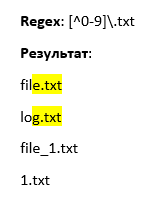

Опять же, так как квадратные скобки - это спецсимвол, чтобы найти их, нужно их экранировать: `\[` и `\]`. То же касается случаев, где карет и дефис должны быть одной из опцией в выборе внутри квадратных скобок: `\-` и `\^`.

> *Что выдаст регулярка `fruits\[[0-9]\]`?*

Еще один способ перечислить варианты (если дело касается подстрок больших, чем один символ): вертикальная черта `|`.

**NB!** Обязательно нужно отделять границы вариантов круглыми скобками. Иначе выйдет что-то такое:

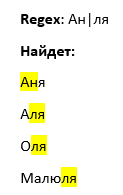

> Как нам написать регулярку, чтобы она брала только имена *Аня* и *Аля*?

Итого, если мы хотим указать допустимые значения:
1. Одного символа — используем `[]`
2. Нескольких символов или целого слова — используем `|`

### А какие есть метасимволы для диапазонов?

| **Символ** | **Эквивалент**              | **Пояснение**                                                                 |
|:------------:|-----------------------------|-------------------------------------------------------------------------------|
| `\d`         | `[0-9]`                       | Цифровой символ                                                               |
| `\D`         | `[^0-9]`                      | Нецифровой символ                                                             |
| `\s`         | `[ \f\n\r\t\v]`               | Пробельный символ                                                             |
| `\S`         | `[^ \f\n\r\t\v]`              | Непробельный символ                                                           |
| `\w`         | `[[:word:]]` / `[a-zA-Z0-9_]`   | Буквенный (латиница) или цифровой символ или знак подчёркивания               |
| `\W`         | `[^[:word:]]` / `[^a-zA-Z0-9_]` | Любой символ, кроме буквенного (латиница) / цифрового символа / подчёркивания |
| .          |                             | Вообще любой символ                                                           |

**NB!** `\w` и `\W` работают **только** с латиницей. Обратите внимание на отрицание $-$ большая буква!

Что такое пробельный символ?

| **Символ** | **Пояснение**                         |
|:----------:|---------------------------------------|
|      ` `     | Пробел                                |
|     `\r`     | Возврат каретки (Carriage return, CR) |
|     `\n`     | Перевод строки (Line feed, LF)        |
|     `\t`     | Табуляция (Tab)                       |
|     `\v`     | Вертикальная табуляция (vertical tab) |
|     `\f`     | Конец страницы (Form feed)            |
|    `[\b]`    | Возврат на 1 символ (Backspace)       |

Но обычно, когда мы вводим `\s`, мы имеем в виду пробел, табуляцию, или перенос строки.

Есть еще символьные классы POSIX. Они очень полезные (для латиницы), **НО!** Python, например, их не ест...(

| **Класс символов** | **Пояснение**                                                                 |
|:------------------:|-------------------------------------------------------------------------------|
|     `[[:alnum:]]`    | Буквы или цифры: `[a-zA-Z0-9]`                                          |
|     `[[:alpha:]]`    | Только буквы: `[a-zA-Z]`                                                |
|     `[[:digit:]]`    | Только цифры: `[0-9]`                                                           |
|     `[[:graph:]]`    | Только отображаемые символы (пробелы, служебные знаки и т. д. не учитываются) |
|     `[[:print:]]`    | Отображаемые символы и пробелы                                                |
|     `[[:space:]]`    | Пробельные символы `[ \f\n\r\t\v]`                                              |
|     `[[:punct:]]`    | Знаки пунктуации: !"#$%&'()*+,\-./:;<=>?@[]^_`{\|}                            |
|     `[[:word:]]`     | Буквенный или цифровой символ или знак подчёркивания: `[a-zA-Z0-9_]`    |

### Список всех метасимволов, которые, если что, нужно экранировать!

`[ ] \ ^ $ . | ? * + ( ) { }`

Так... С первыми тремя все понятно. А что такое `^` и `$`? Это символ начала и конца строки (да-да, а внутри квадратных скобок первый символ $-$ это исключение). Начало строки мы отсчитываем от самого начала / переноса строки при помощи `\n`. То же самое с концом строки (конец текста / знак перед переносом строки)... У них есть еще аналоги: `\A` и `\Z` (начало и конец сторки соответственно).

Из подобных символов есть еще удобный `\b`, который обозначает границу слова (это сложнее, чем просто по пробелу), **НО!** с кириллицей она работает через раз, поэтому аккуратно!

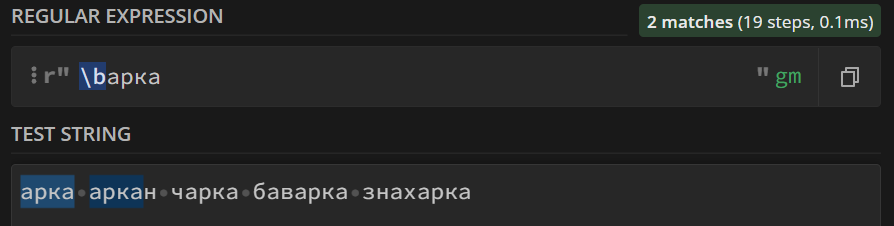

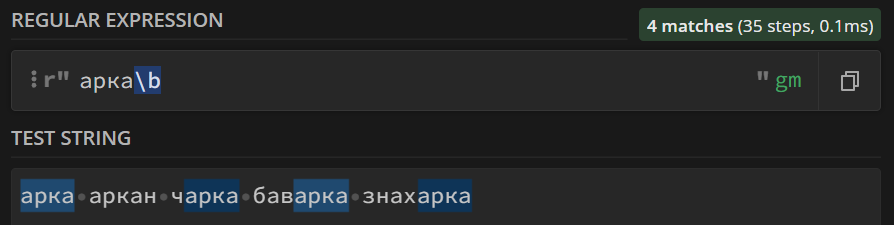

### А что делать, если мы не знаем точное число символов?

**Квантификаторы**

| **Квантификатор** | **Число повторений**            |
|:-----------------:|---------------------------------|
|         `?`         | Ноль или одно `{0,1}`                  |
|         `*`         | Ноль или более `{0,}`                 |
|         `+`         | Один или более `{1,}`                 |
|        `{n}`        | Ровно n раз                     |
|        `{n,}`       | n или больше раз                |
|        `{,m}`       | m или меньше раз (включительно) |
|       `{n,m}`       | от n до m раз (включительно)    |


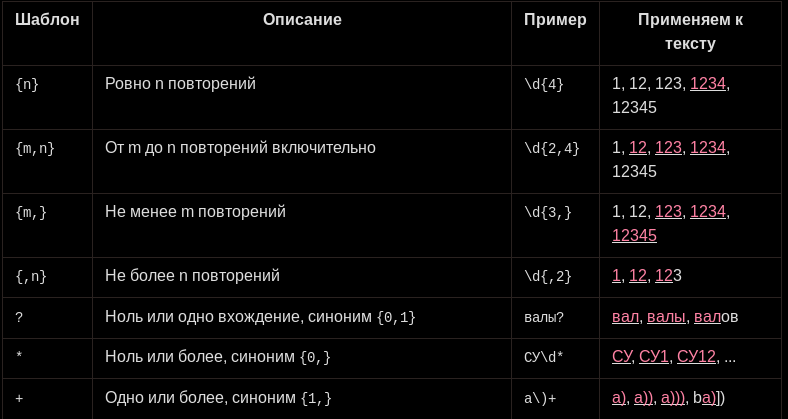

**NB!** Квантификатор дефолтно относится к **последнему** символу перед ним (метасимвол / экранированный символ $-$ это один символ). Если вы хотите отнести его не к одному символу, а к нескольким, используйте группировку при помощи круглых скобочек: `()`.

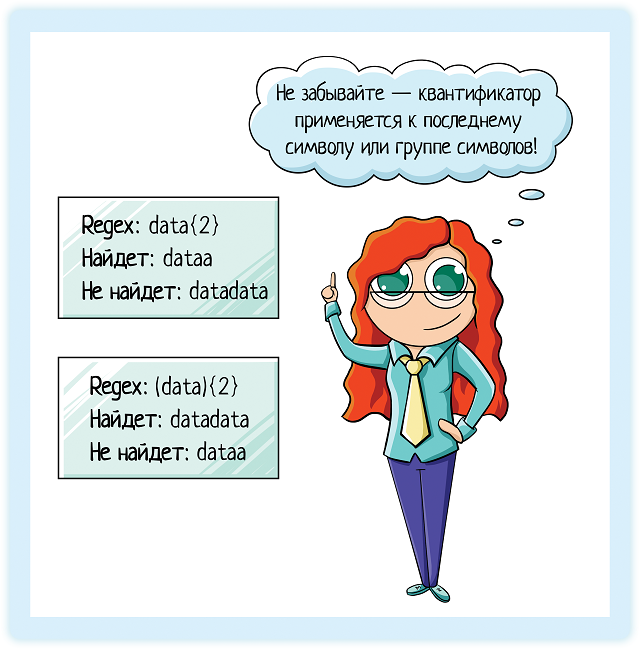

Еще важно:

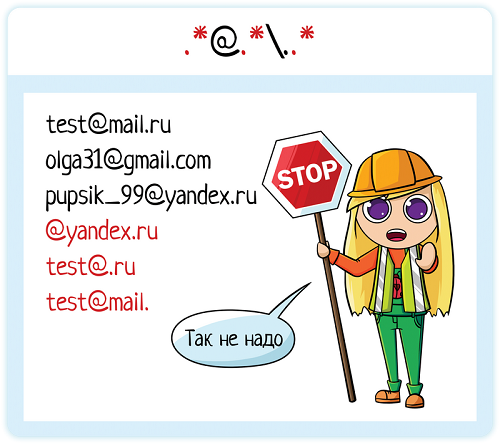

Если не задать обратного, то все квантификаторы **жадные**. Это значит, что они ищут до тех пор, пока не смогут "захватить" максимум:

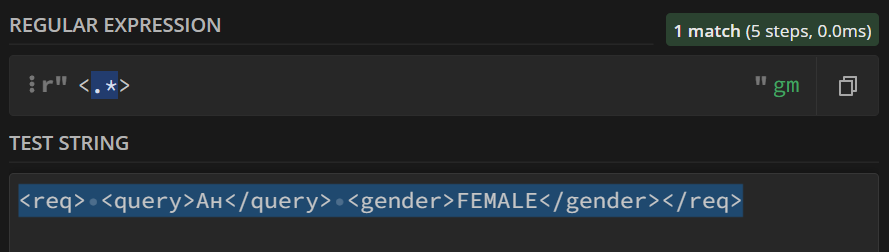

Это связано с тем, как работает жадная регулярка: мы идем вперед, пока не встречаем первый символ, который не уклазывается в паттерн.

Если мы хотим из жадного квантификатора сделать **ленивый**, достаточно просто добавить после знак вопроса `?`. Тогда захват будет происходить до "первого соответствия".

| **Жадный** | **Ленивый** |
|:----------:|:-----------:|
|      `*`     |      `*?`     |
|      `+`     |      `+?`     |
|    `{n,}`    |    `{n,}?`    |


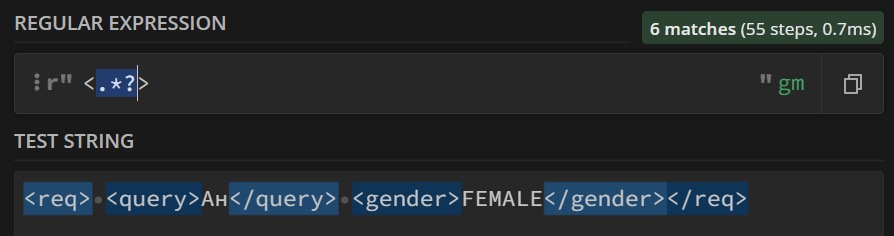

### Где потренироваться?

* [RegexOne](https://regexone.com/) (чтобы начать)
* [кроссворды](https://jimbly.github.io/regex-crossword/) (чтобы почиллить)
* [Regex Tuesday](https://callumacrae.github.io/regex-tuesday/) (чтобы подумать)
* [Slash\Escape](https://www.therobinlord.com/projects/slash-escape) (чтобы испугаться)

### Какое это отношение имеет к Python'у?

Прямое: есть библиотека `re` ([ссылка](https://docs.python.org/3/library/re.html) на документацию)

In [2]:
import re

In [3]:
print(re.__doc__)

Support for regular expressions (RE).

This module provides regular expression matching operations similar to
those found in Perl.  It supports both 8-bit and Unicode strings; both
the pattern and the strings being processed can contain null bytes and
characters outside the US ASCII range.

Regular expressions can contain both special and ordinary characters.
Most ordinary characters, like "A", "a", or "0", are the simplest
regular expressions; they simply match themselves.  You can
concatenate ordinary characters, so last matches the string 'last'.

The special characters are:
    "."      Matches any character except a newline.
    "^"      Matches the start of the string.
    "$"      Matches the end of the string or just before the newline at
             the end of the string.
    "*"      Matches 0 or more (greedy) repetitions of the preceding RE.
             Greedy means that it will match as many repetitions as possible.
    "+"      Matches 1 or more (greedy) repetitions of t

Например, можно так:

In [ ]:
# Что выдаст код?

text = "The mouse was carefully disguised but caught quickly by the fox."
re.findall(r"\w+ly\b", text)

А еще можно сделать `split` по нескольким символам на выбор:

In [ ]:
import re

text = '''Я люблю орехи!
А какие орехи твои любимые?
Например, мне нравится грецкие орехи. Или кешью'''

re.split(r'[!?.]\s', text)

['Я люблю орехи',
 'А какие орехи твои любимые',
 'Например, мне нравится грецкие орехи',
 'Или кешью']

Тоже заменять текст при помощи `re.sub(pattern, repl, string)` (что заменять, чем заменять, где заменять):

In [ ]:
# Что делает регулярка r'[a-zA-Z0-9_.]+@[a-zA-Z]+?\.[a-zA-Z]{2,6}(.[a-zA-Z]{2,6})?'

In [ ]:
print(re.sub(r'[a-zA-Z0-9_.]+@[a-zA-Z]+?\.[a-zA-Z]{2,6}(.[a-zA-Z]{2,6})?', '%email%',
'''I had my own e-mail which is katia.kozlova1@gmail.com.
Then my uni gave me another one: erkozlova_2@edu.hse.ru.
Also there is a group email lingvo202@yandex.ru! Now I don't check my e-mails at all...'''))

I had my own e-mail which is %email%.
Then my uni gave me another one: %email%.
Also there is a group email %email%! Now I don't check my e-mails at all...


Три способа найти что-то регулярками:
* `re.search(pattern, string)` $-$ ищет в строке подстроку (возвращает `None`, если не нашел), возвращает объект с местом и значением
* `re.match(pattern, string)` $-$ ищет подстроку с абсолютного начала строки (по сути, возвращает, начинается ли строка с подстроки)
* `re.findall(pattern, string)` $-$ ищет все вхождения подстроки в строку


In [8]:
my_match = re.search(r'\bf[a-z]*', 'which foot or hand fell fastest')
print(my_match)

<re.Match object; span=(6, 10), match='foot'>


Здесь вы видите то, что называется r-строки (*cырые строки* или *raw string*) – строки, в которых обратный слеш (`\`) не модифицирует следующий за ним символ.

Если хочется вывести значения , то это делается с помощью `.span()` (для индексов) и `.group()` (для самих строк):

In [ ]:
pattern = re.search(r'\bf[a-z]*', 'which foot or hand fell fastest')

print(pattern.span(), pattern.group(), sep='\n')

(6, 10)
foot


In [19]:
print(re.match(r'f[a-z]*', 'which foot or hand fell fastest'))

None


In [14]:
re.findall(r'\bf[a-z]*', 'which foot or hand fell fastest')

['foot', 'fell', 'fastest']

In [15]:
' '.join(re.findall(r'\bf[a-z]*', 'which foot or hand fell fastest'))

'foot fell fastest'

Некоторый прикол:

In [25]:
re.findall('abc(de|re|se)fg(123)', 'abcsefg123, abcdefg123, abcrefg123, and again abcdefg123')

[('se', '123'), ('de', '123'), ('re', '123'), ('de', '123')]

А поправить как?

In [ ]:
# код тут

Еще прикол:

In [41]:
re.findall('(abc(de|re|se)fg\\2)', 'abcsefgse, abcdefgde, abcrefgse, and again abcdefgre')

[('abcsefgse', 'se'), ('abcdefgde', 'de')]

#### Задача №1

Когда вы оформляете код в Markdown (стиль, использующийся, например, при оформлении `.md` файлов на GitHub и `.ipynb` тетрадок), там используется особый стиль, в котором одно нижнее подчеркивание \_типа такого\_ делает текст внутри курсивным, а двойное \_\_как здесь\_\_ — жирным. Вам подается текст в подобном формате: найдите и выведите списком все курсивные выделения (но не жирные).

Пример текста с выделенными кусками:

Вставая утром с постели, \_\_Скорпион\_\_ не может даже предположить, какие изменения произойдут в его жизни. \_\_Этот день\_\_ может оказаться \_поворотным\_: события обещают развиваться \_не так, как он предполагал\_, заставляя Скорпиона
прямо на ходу принимать \_важные решения\_. Неожиданные известия, дела, новые знакомства – \_\_любое\_\_ событие имеет шанс отразиться на судьбе Скорпиона, оставив в его жизни \_значительный\_ след. \_Ему следует помнить об этом, за что
бы он ни брался и какие бы решения ни принимал.\_


In [ ]:
# ваш код тут

#### Задача №2

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. Поэтому нужно заменить все вхождения времени на строку  (TBD) . Время — это валидная строка вида `HH:MM:SS` или `HH:MM`, в которой `HH` — число от 00 до 23, а `MM` и `SS` — числа от 00 до 59.

        >>> Уважаемые! Если вы к 09:00 не вернёте чемодан, то уже в 09:00:01 я за себя не отвечаю. PS. С отношением 25:50 всё нормально!
        <<< Уважаемые! Если вы к (TBD) не вернёте чемодан, то уже в (TBD) я за себя не отвечаю. PS. С отношением 25:50 всё нормально!

In [ ]:
# ваш код тут